In [ ]:
# in this notebook varya is trying to add elevation to the netcdf data: 

# import geopotential file, convert to elevation 
# import HMA boundaries 

## for multiple things: (regions and bins) 
# 

# mean annual precipitation 

# loop for every file: 
# add z variable to all files 
# clip where the elevation is whithin the certain bin 
# find median value in space 

In [66]:
import xarray as xr

In [106]:
geopotential = xr.open_dataset('elevation/geopotential.nc')
# units m**2 s**-2
# The geopotential height can be calculated by dividing the geopotential 
# by the Earth's gravitational acceleration, g (= 9.80665 m s-2). 
geopotential['z'] = geopotential['z'] / 9.81

In [144]:
era5 = xr.open_dataset('era5_resampled_to_annual/total_precipitation_annual_sum_1979to2020.nc')

In [145]:
# add elevation:
era5['z'] = geopotential['z'] # data array 


In [168]:
era5 = era5.where(era5.z > 1000, drop=True)


In [161]:
import geopandas as gpd 

hma = gpd.read_file('HMA_regions/HMA_regions.shp')


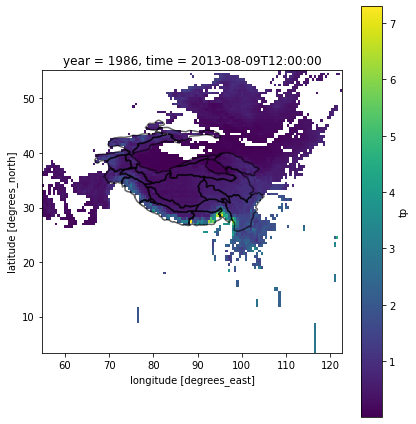

In [162]:
import matplotlib.pyplot as plt

era52 = era5.isel(year=7)

fig, ax = plt.subplots(figsize=(6, 6))
era52.tp[:,:,1].plot()
hma.boundary.plot(ax=ax, alpha=.6, color='black')
fig.tight_layout()